In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Missing data
Missing data occurs when values are simply absent or contain NaN (not a number) for any feature (column) in a given dataset. This will cause issues with many machine learning algorithms.

**Missing data can negatively impact:**
- Data visualization
- Arithemetic computations
- Machine learning algorithms

**Common methods to deal with missing data:**
- Remove rows or columns containing missing data
- Impute with mean or median
- Impute with mode (most frequently occuring feature)
- Impute with forward or backward fill
- Interpolate data between two points

*Note: Domain knowledge is often neeeded to decide how to fill nulls.*

In [7]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df = df[df > 0]
df

,A,B,C,D
0,0.233468,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,2.104171,NaN,1.305072,0.654175
3,NaN,0.242884,NaN,2.707263
4,0.435345,2.923750,0.050736,0.131905
5,NaN,NaN,NaN,0.134448
6,NaN,NaN,0.182764,NaN
7,1.016530,0.333731,1.573967,NaN
8,NaN,NaN,0.540937,NaN
9,NaN,NaN,1.024900,0.886574


In [10]:
copy = df.copy()
copy.drop(columns="D", inplace=True)

## dropna
Remove rows (default), or columns, containing null.

**Parameters**
- **how** = "any" (default), or "all"
- **thresh** = set number of (non-missing) values a row must contain in order to *not* drop
- **subset** only look for NaN in subset of columns (or rows)
- **axis** = "index" (default), or "columns"

In [31]:
copy.dropna(axis="columns", subset=2)

,A,C
0,0.233468,NaN
1,NaN,NaN
2,2.104171,1.305072
3,NaN,NaN
4,0.435345,0.050736
5,NaN,NaN
6,NaN,0.182764
7,1.016530,1.573967
8,NaN,0.540937
9,NaN,1.024900


### fillna
Fill missing values.

In [56]:
copy = df.copy()
#copy.fillna(44545) # Fill every NA in dataframe with value 44545
copy["A"].fillna(copy["A"].median(), inplace=True)
# copy["B"].mode()[0] # Mainly for categorical data
copy["B"].ffill(inplace=True)
copy["D"].bfill(inplace=True)
copy["C"].interpolate(inplace=True)
copy


,A,B,C,D
0,0.233468,NaN,NaN,0.654175
1,0.725937,NaN,NaN,0.654175
2,2.104171,NaN,1.305072,0.654175
3,0.725937,0.242884,0.677904,2.707263
4,0.435345,2.923750,0.050736,0.131905
5,0.725937,2.923750,0.116750,0.134448
6,0.725937,2.923750,0.182764,0.886574
7,1.016530,0.333731,1.573967,0.886574
8,0.725937,0.333731,0.540937,0.886574
9,0.725937,0.333731,1.024900,0.886574


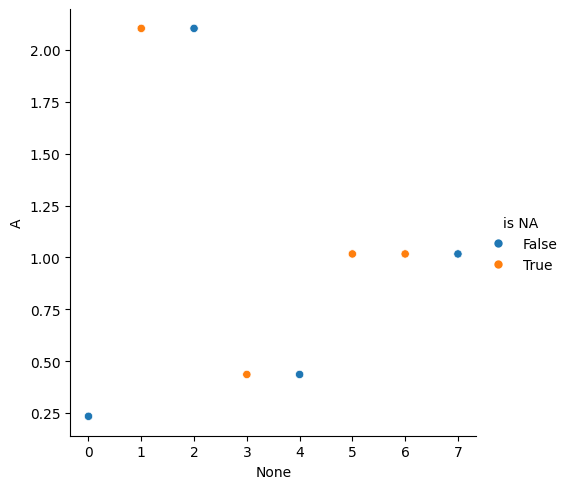

In [66]:
copy = df.copy()
copy["is NA"] = copy["A"].isna()
copy["A"].bfill(inplace=True)
sns.relplot(x=copy.index, y="A", hue="is NA", data=copy)